# TASK 1

## a

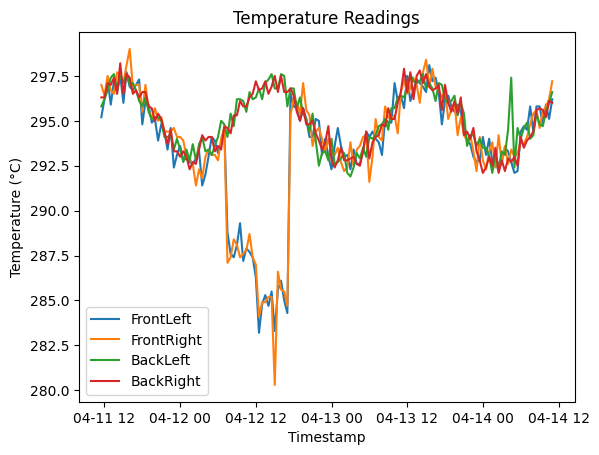

FrontLeft: mean = 293.5055555555556, std = 3.3340745096732363
FrontRight: mean = 293.6069444444445, std = 3.4564554538695136
BackLeft: mean = 295.0625, std = 1.5877095698904404
BackRight: mean = 294.9770833333333, std = 1.647533386229627


In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the data from the CSV file
data = pd.read_csv('room-temperature.csv')

# Extract the timestamp and temperature readings for each sensor
timestamp = pd.to_datetime(data['Date'])
sensors = ['FrontLeft', 'FrontRight', 'BackLeft', 'BackRight']

# Plot the temperature readings for each sensor against the timestamp
for sensor in sensors:
    plt.plot(timestamp, data[sensor], label=sensor)

plt.title('Temperature Readings')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

# Calculate the mean and standard deviation of the temperature readings for each sensor
for sensor in sensors:
    print('{}: mean = {}, std = {}'.format(sensor, data[sensor].mean(), data[sensor].std()))

## b

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


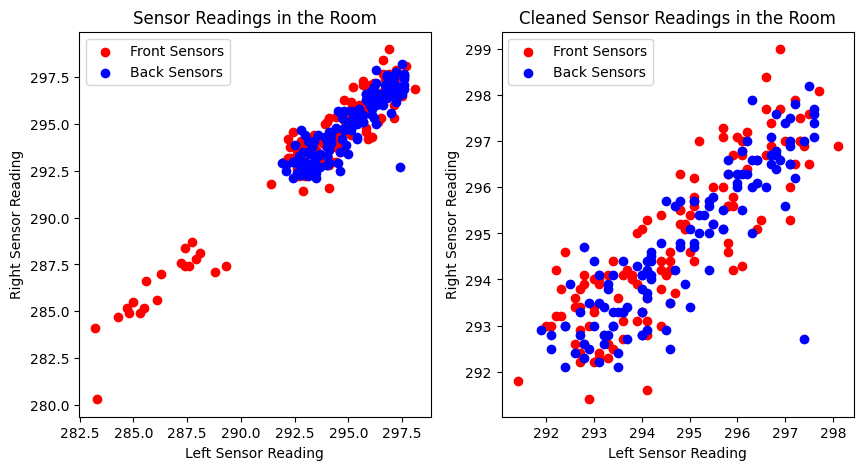

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the data from CSV file
df = pd.read_csv('room-temperature.csv')

# Plot the readings of back sensors against front sensors
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax[0].scatter(df['FrontLeft'], df['FrontRight'], label='Front Sensors', color='red')
ax[0].scatter(df['BackLeft'], df['BackRight'], label='Back Sensors', color='blue')
ax[0].set_xlabel('Left Sensor Reading')
ax[0].set_ylabel('Right Sensor Reading')
ax[0].set_title('Sensor Readings in the Room')
ax[0].legend()

# Perform k-means clustering with k = 2
X = df[['FrontLeft', 'FrontRight', 'BackLeft', 'BackRight']]
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
labels = kmeans.labels_

# Identify the main cluster and eliminate the data-points outside it
main_cluster = labels[0]
df = df[labels == main_cluster]

# Plot the cleaned data
ax[1].scatter(df['FrontLeft'], df['FrontRight'], label='Front Sensors', color='red')
ax[1].scatter(df['BackLeft'], df['BackRight'], label='Back Sensors', color='blue')
ax[1].set_xlabel('Left Sensor Reading')
ax[1].set_ylabel('Right Sensor Reading')
ax[1].set_title('Cleaned Sensor Readings in the Room')
ax[1].legend()

plt.show()


## c

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


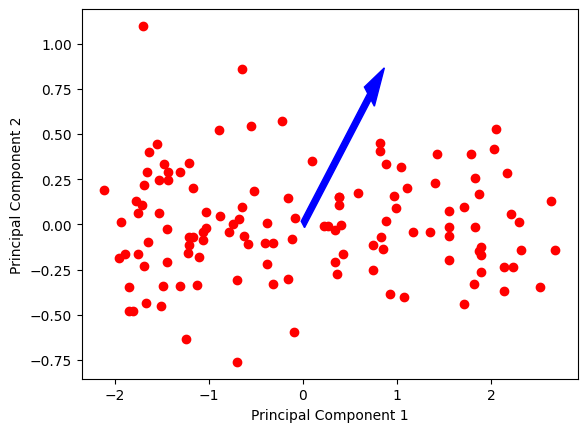

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the room-temperature data
df = pd.read_csv('room-temperature.csv')

# Drop the 'Date' column
df = df.drop(columns=['Date'])

# Combine the front-left and front-right readings into one variable
df['Front'] = (df['FrontLeft'] + df['FrontRight']) / 2

# Combine the back-left and back-right readings into one variable
df['Back'] = (df['BackLeft'] + df['BackRight']) / 2

# Drop the individual front and back readings
df = df.drop(columns=['FrontLeft', 'FrontRight', 'BackLeft', 'BackRight'])

# Perform k-means clustering with k=2 on the back vs. front readings
kmeans = KMeans(n_clusters=2)
kmeans.fit(df[['Front', 'Back']])
df['cluster'] = kmeans.labels_

# Filter the data to keep only the largest cluster
largest_cluster = df[df['cluster'] == df['cluster'].value_counts().idxmax()]
largest_cluster = largest_cluster.drop(columns=['cluster'])

# Perform PCA on the largest cluster
X = StandardScaler().fit_transform(largest_cluster)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Plot the scatter plot with the direction of the principal component
plt.scatter(principal_components[:, 0], principal_components[:, 1], color='red')
plt.arrow(0, 0, pca.components_[0, 0], pca.components_[0, 1], color='blue', width=0.05)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# TASK 2

## a

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv('training.csv', header=None)

# Split data into input and label
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear SVM for different values of C
C_values = list(range(1, 21))
for C in C_values:
    # Train a linear SVM
    clf = SVC(kernel='linear', C=C)
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate the accuracy score
    acc_score = accuracy_score(y_test, y_pred)

    # Print the accuracy score for the current value of C
    print("C = {}, Accuracy score: {}".format(C, acc_score))


C = 1, Accuracy score: 0.926829268292683
C = 2, Accuracy score: 0.926829268292683
C = 3, Accuracy score: 0.926829268292683
C = 4, Accuracy score: 0.926829268292683
C = 5, Accuracy score: 0.926829268292683
C = 6, Accuracy score: 0.926829268292683
C = 7, Accuracy score: 0.926829268292683
C = 8, Accuracy score: 0.926829268292683
C = 9, Accuracy score: 0.926829268292683
C = 10, Accuracy score: 0.926829268292683
C = 11, Accuracy score: 0.926829268292683
C = 12, Accuracy score: 0.926829268292683
C = 13, Accuracy score: 0.926829268292683
C = 14, Accuracy score: 0.926829268292683
C = 15, Accuracy score: 0.926829268292683
C = 16, Accuracy score: 0.926829268292683
C = 17, Accuracy score: 0.926829268292683
C = 18, Accuracy score: 0.926829268292683
C = 19, Accuracy score: 0.926829268292683
C = 20, Accuracy score: 0.926829268292683


## b

In [35]:


import numpy as np
import pandas as pd
from sklearn import svm

# Load the data sets
train_data = pd.read_csv('training.csv', header=None)
valid_data = pd.read_csv('validation.csv', header=None)

# Separate the input vectors and labels
X_train, y_train = train_data.iloc[:, :-1].values, train_data.iloc[:, -1].values
X_valid, y_valid = valid_data.iloc[:, :-1].values, valid_data.iloc[:, -1].values

# Split the validation set into 10 subsets
X_subsets, y_subsets = np.array_split(X_valid, 10), np.array_split(y_valid, 10)

# Define the range of C values to try
C_values = np.arange(1, 21)

# Initialize arrays to store the classification error and its variance for each C
error_means, error_vars = np.zeros_like(C_values, dtype=float), np.zeros_like(C_values, dtype=float)

# Iterate over the C values
for i, C in np.ndenumerate(C_values):
    # Train a linear SVM with the current C value
    clf = svm.SVC(kernel='linear', C=C)
    clf.fit(X_train, y_train)
    
    # Compute the classification error for each subset
    errors = np.mean([clf.score(X_subsets[j], y_subsets[j]) for j in range(len(X_subsets))])
    
    # Compute the mean and variance of the classification error for the current C
    error_means[i], error_vars[i] = errors, np.var(errors)

# Compute the final estimate of the classification error and its standard deviation
final_error, final_error_std = np.mean(error_means), np.sqrt(np.mean(error_vars))

print("Final estimate of classification error:", final_error)
print("Standard deviation of classification error:", final_error_std)


Final estimate of classification error: 0.9337145061728398
Standard deviation of classification error: 0.0


## c

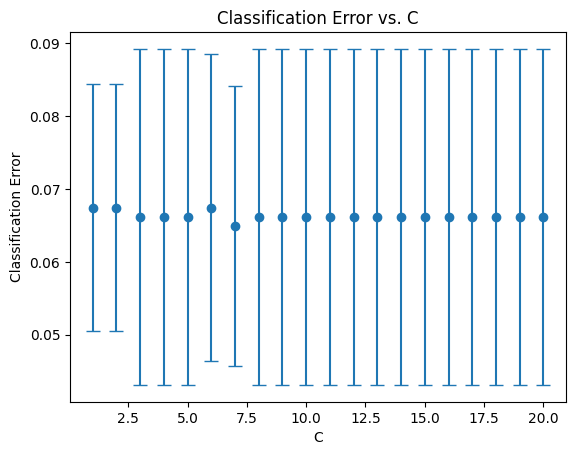

In [36]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.metrics import zero_one_loss
import matplotlib.pyplot as plt

# Load training dataset
train_data = pd.read_csv('training.csv', header=None)
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values

# Load validation dataset
valid_data = pd.read_csv('validation.csv', header=None)
X_valid = valid_data.iloc[:, :-1].values
y_valid = valid_data.iloc[:, -1].values

# Create a list of C values to test
C_values = list(range(1, 21))

# Initialize lists to store mean and standard deviation of classification error for each C
mean_error = []
std_error = []

# Split validation set into 10 subsets of equal size
valid_sets = np.array_split(valid_data, 10)

# Train SVM for each C and compute error for each subset of validation set
for C in C_values:
    clf = svm.SVC(kernel='linear', C=C)
    clf.fit(X_train, y_train)
    error = []
    for subset in valid_sets:
        X_valid_subset = subset.iloc[:, :-1].values
        y_valid_subset = subset.iloc[:, -1].values
        y_pred = clf.predict(X_valid_subset)
        error.append(zero_one_loss(y_valid_subset, y_pred))
    mean_error.append(np.mean(error))
    std_error.append(np.std(error))

# Plot mean classification error with standard deviation for each C
plt.errorbar(C_values, mean_error, yerr=std_error, fmt='o', capsize=5)
plt.xlabel('C')
plt.ylabel('Classification Error')
plt.title('Classification Error vs. C')
plt.show()


In [37]:
!jupyter nbconvert --to html AM41ML_Statistical_Machine_Learning_.ipynb


[NbConvertApp] Converting notebook AM41ML_Statistical_Machine_Learning_.ipynb to html
[NbConvertApp] Writing 852766 bytes to AM41ML_Statistical_Machine_Learning_.html
